In [ ]:
import requests
import json
import pandas as pd
import re
import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import networkx as nx
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
# nltk.download('popular')
stop = stopwords.words('english')

In [24]:
api_key = 'f0f8be8d318201330fe3f845c883fa9f45ac014f'

In [42]:
#structuring params for person record API request
p_params_d = {'item_type': 'Person', 'key': api_key}

In [43]:
people_request = requests.get('https://digital.janeaddams.ramapo.edu/api/items?', params = p_params_d)

In [44]:
people_items_json = json.loads(people_request.text)

In [45]:
#print(json.dumps(people_items_json, indent=4))

In [46]:
#pulling names:
name_list = []
for dict in people_items_json:
    for element in dict["element_texts"]:
        if element["element"]["name"] == "Title":
            name_list.append(element["text"])

In [47]:
print(name_list)

['Addams, Jane (1860-1935)', 'Roosevelt, Theodore (1858-1919)', 'Fawcett, Millicent  Garrett (1847-1929)', 'Kellor, Frances Alice (1873-1952)', 'Johnson, Hiram W. (1866-1945)', 'Pankhurst, Emmeline Goulden  (1858-1928)', 'Harper, Ida Husted (1853-1931)', 'Dodge, Caroline L. (1869-1923)', 'Breasted, James Henry (1865-1935)', 'Ely, Richard T. (1854–1943)', 'Ely, Anna M. Anderson (1860-1923)', 'Coit, Stanton (1857–1944)', 'Clark, John (1870?-?)', 'Haldeman-Julius, Anna Marcet (1887-1941)', 'Jean Marcet', 'Wald, Lillian D. (1867–1940)', 'Maltbie, Milo Roy (1871-1962)', 'Fox, Richard T. (1871-1937)', 'Meade, Charles A. (1876-1949)', 'Baldauf, Minnie Lina (1872-1942)', 'Hill, Mary Dorsey Anderson (1868-1958)', 'Berger, Meta Schlichting (1873-1944)', 'Brownell, Baker (1887–1965)', 'Abee, Robert (?-?)', 'Haldeman, Sarah Alice Addams (1853-1915)', 'White, William Allen (1868-1944)', 'Linn, John Addams (1872-1918)', 'Faville, Frederick F. (1865-1954)', 'Sax, Stella Rosenfield (1864-1928)', 'Wein

In [48]:
#pulling tags
people_tag_list = []
for dict in people_items_json:
    temp_list = []
    for d in dict['tags']:
        temp_list.append(d['name'])
    people_tag_list.append(temp_list)

In [49]:
print(people_tag_list)

[['Civil Rights', 'Education', 'Hull-House', 'Peace', 'Progressive Party', 'Settlement Movement', 'Social Work', 'Woman Suffrage', 'Women'], ['Men', 'Military', 'Politics', 'Progressive Party', 'Republican Party'], ['Civil Rights', 'England', 'Social Reform', 'Woman Suffrage', 'Women'], ['Labor', 'Law', 'Progressive Party', 'Women'], ['Men', 'Politics', 'Progressive Party'], ['Crime', 'England', 'Politics', 'Woman Suffrage', 'Women'], ['Journalism', 'Woman Suffrage', 'Women'], [], ['Education', 'Men'], ['Economics', 'Education', 'Men'], ['Housework', 'Women'], ['England', 'Religion', 'Settlement Movement'], ['Chicago', 'Law', 'Men'], ['Family', 'Women'], ['Medicine', 'Peace', 'Public Health', 'Settlement Movement', 'Woman Suffrage', 'Women'], ['Men', 'Utilities'], ['Civil Service', 'Men'], [], ['Settlements', 'Women'], ['Settlements', 'Women'], ['Education', 'Journalism', 'Peace', 'Socialism', 'Women'], ['Education', 'Journalism', 'Men', 'Philosophy'], ['Men'], ['Family', 'Finance', 'W

In [133]:
#finding frequency of tags mentioned in dataset
tag_count_d = {}
for item in people_tag_list:
    for tag in item:
        if tag in tag_count_d:
            tag_count_d[tag] += 1 
        else:
            tag_count_d[tag] = 1          

In [137]:
#finding tags mentioned more than once
popular_tag_list = []
for item in tag_count_d.keys():
    if tag_count_d[item] >= 2:
        popular_tag_list.append(item)
       

In [136]:
#pulling text
text_list = []
for dict in people_items_json:
    for element in dict["element_texts"]:
        if element["element"]["name"] == "Biographical Text":
            text_list.append(element["text"])

In [51]:
#print(text_list)

In [52]:
#pulling occupation
occupation_list = []
for dict in people_items_json:
    for element in dict["element_texts"]:
        if element["element"]["name"] == "Occupation":
            occupation_list.append(element["text"])

In [53]:
#print(occupation_list)

In [54]:
#zipping lists and creating dataframe
people_zip = list(zip(name_list, occupation_list, people_tag_list, text_list))

In [55]:
people_df = pd.DataFrame(people_zip, columns = ['Name', 'Occupation', 'Tags', 'Text']) 

In [56]:
#creating newtork graph

In [103]:
G = nx.Graph()

In [109]:
pd.options.display.max_colwidth = 50000

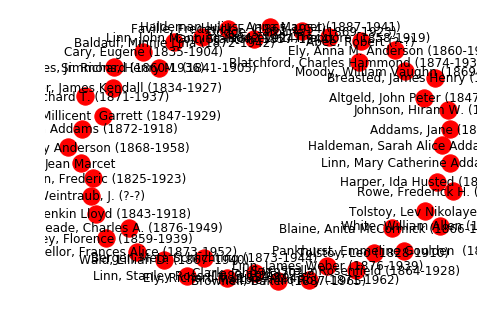

In [111]:
#building intial graph nodes
for index, row in people_df.iterrows():
    G.add_node(row.Name)

nx.draw(G, with_labels = True)
plt.show()    

In [113]:
#creating dict representing nodes and their tags 
keys = name_list
values = people_tag_list
name_tag_dict= {k: v for k, v in zip(keys, values)}


In [142]:
#creating requirements for adding edges to graph
for key in name_tag_dict.keys():
    try:
        temp_list = dict[key]
        for person in name_tag_dict.keys():
            for item in dict[person]:
                if item in temp_list and item in popular_tag_list:
                    G.add_edge(key, person)
    except:
        pass

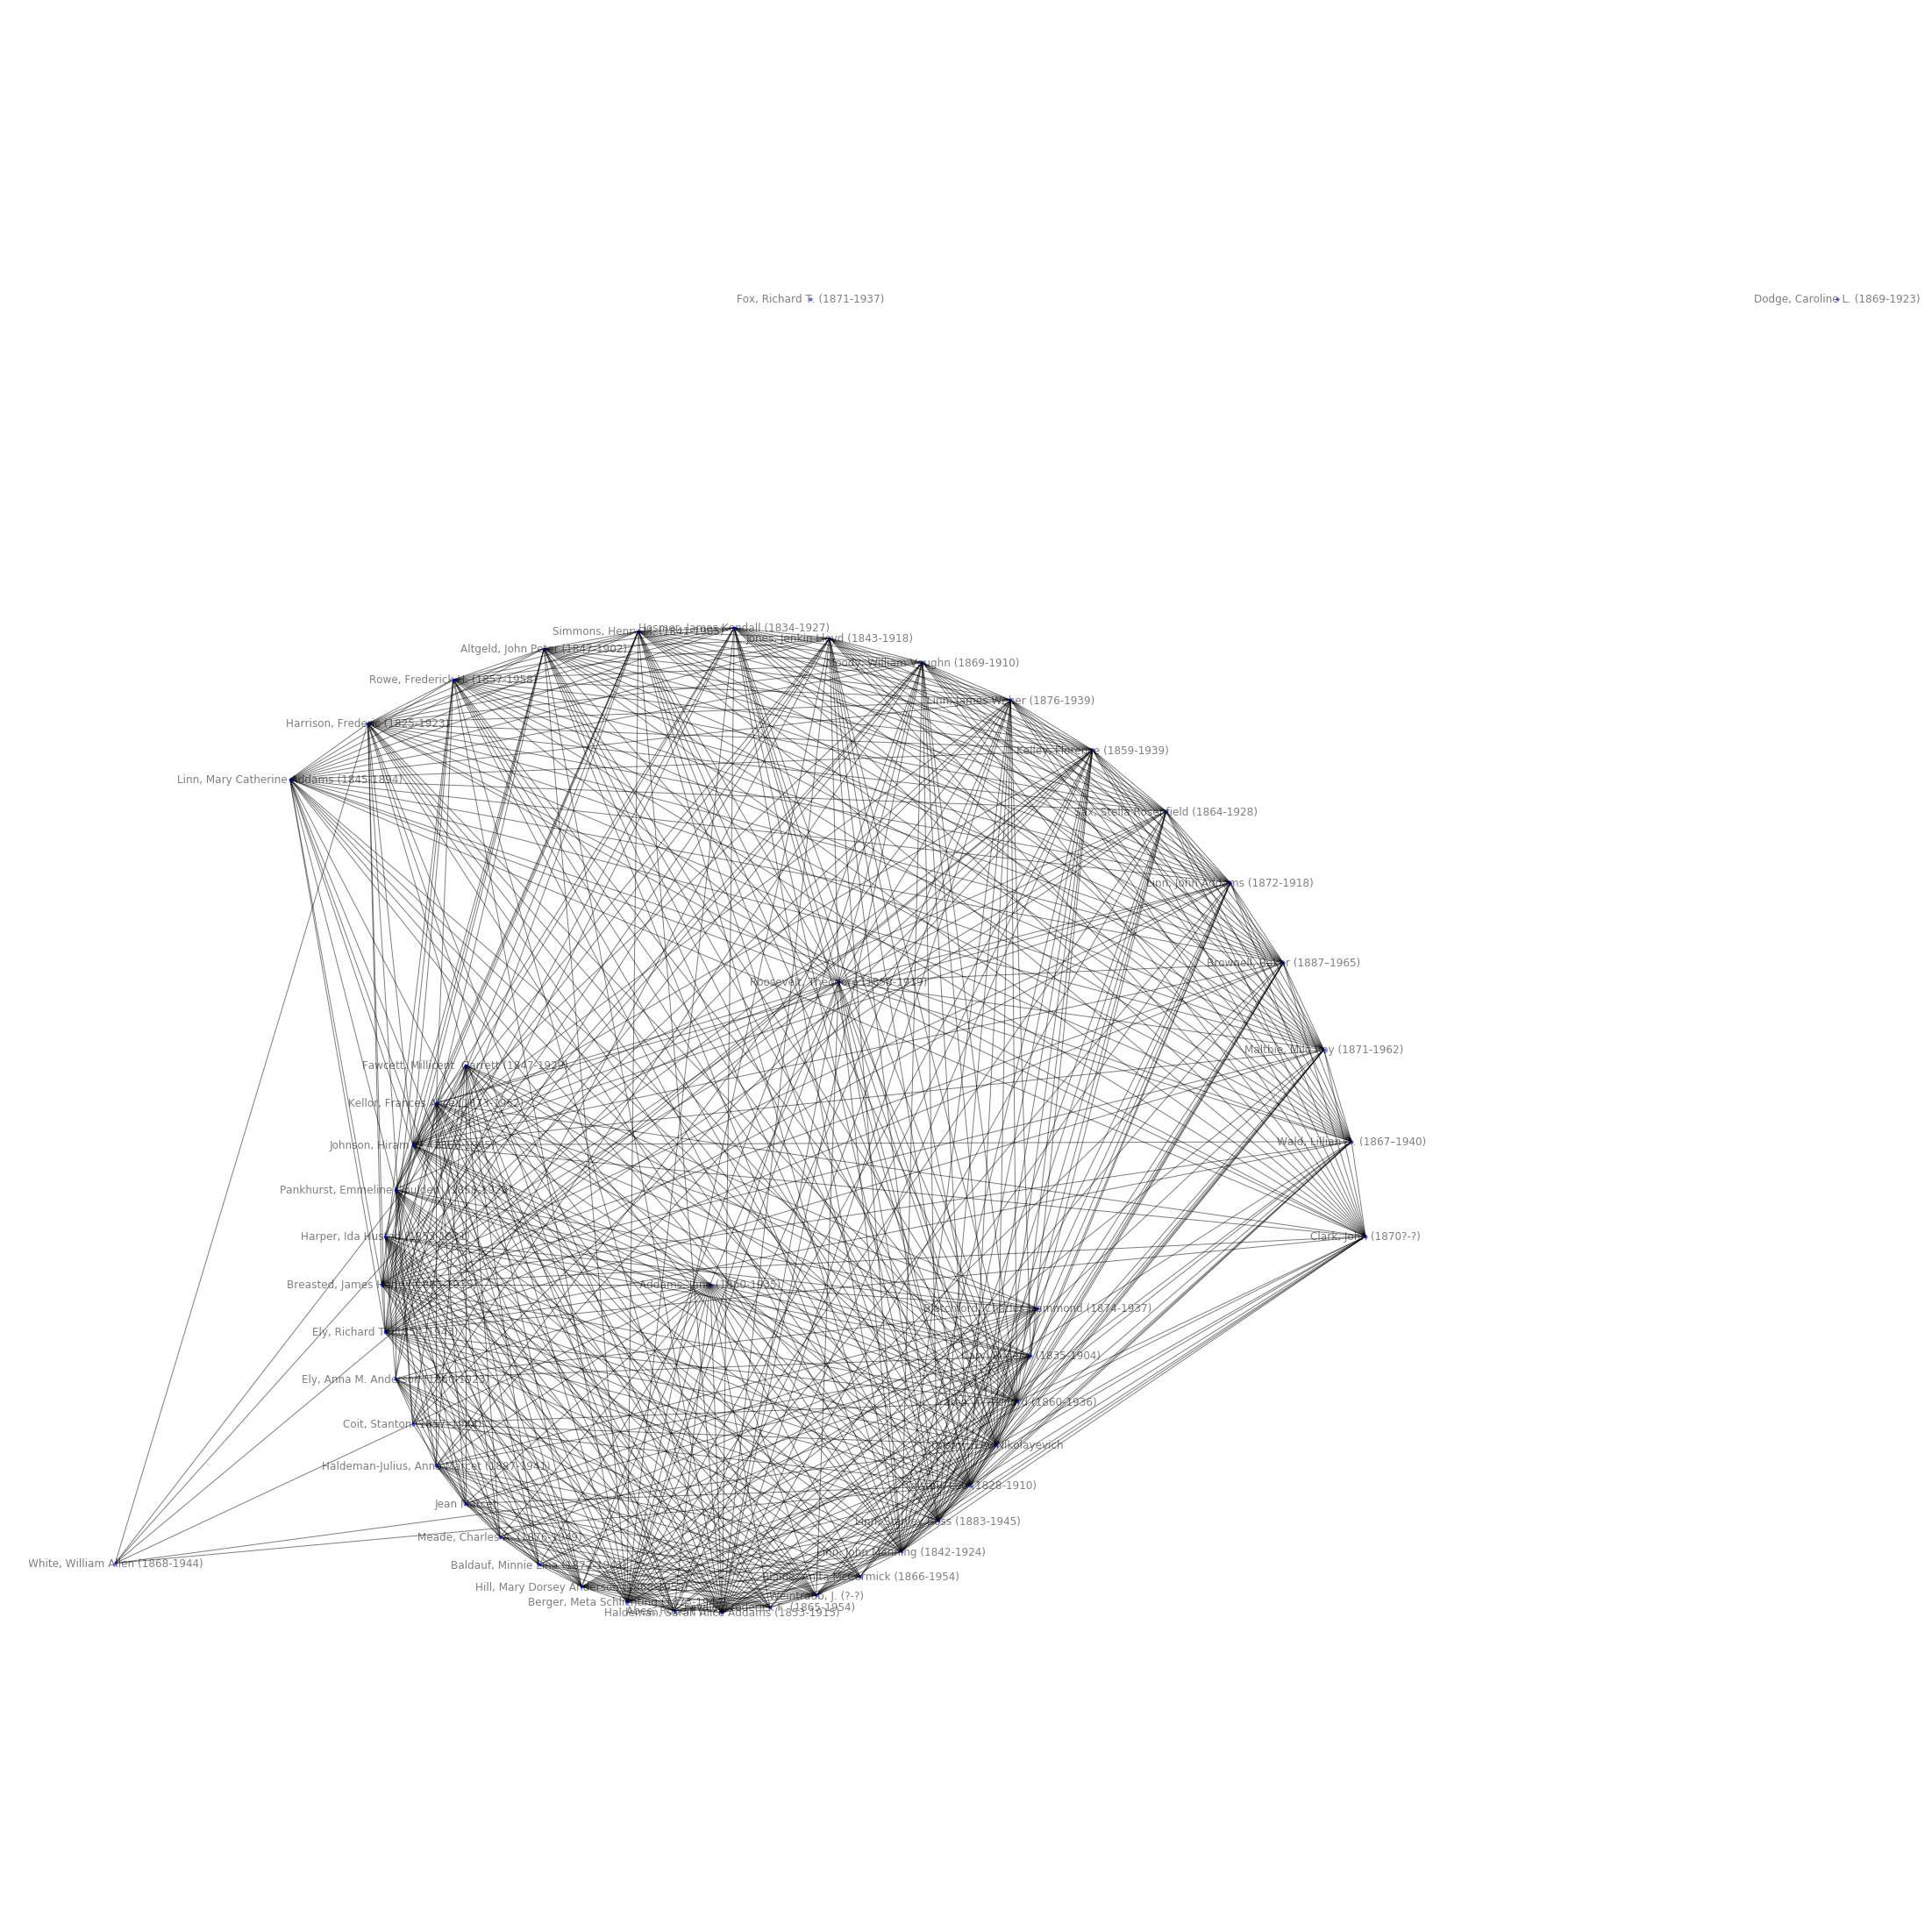

In [143]:
#drawing graph
try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
    except ImportError:
        raise ImportError("This example needs Graphviz and either "
                          "PyGraphviz or pydot")

#G = nx.balanced_tree(3, 5)
pos = graphviz_layout(G, prog='twopi', args='')
plt.figure(figsize=(30, 30))
nx.draw(G, pos, node_size=10, alpha=0.5, node_color="blue", with_labels=True)
plt.axis('equal')
plt.show()